**The Spark Foundation: Data Science & Business Analytics Internship Task 3**

**Exploratory Data Analysis - Retail     Dataset: SampleSuperstore**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the Dataset
SampleSuperstore_df = pd.read_csv('C:/Users/ashis/Desktop/Spark Internship/SampleSuperstore.csv')
SampleSuperstore_df.head(20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


**If we see the data serially we will found that in the given data there is no means for postal code as state is already defining it because it is same for the one state so we will first drop this column**

In [4]:
SampleSuperstore_df = SampleSuperstore_df.drop(['Postal Code'], axis=1)


In [5]:
SampleSuperstore_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Exploring the Data**

**Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column**

In [6]:
SampleSuperstore_df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [7]:
SampleSuperstore_df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [8]:
SampleSuperstore_df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [9]:
SampleSuperstore_df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Hagerstown         1
Port Orange        1
Deer Park          1
Springdale         1
Aberdeen           1
Name: City, Length: 531, dtype: int64

In [10]:

SampleSuperstore_df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

In [11]:
SampleSuperstore_df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [12]:
SampleSuperstore_df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [13]:
SampleSuperstore_df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

**Value Count:**

**1. we found the number of people from the standard class is more that any other class.**

**2. and one more thing is that the this data is all about only one country United state so we can drop tha one because thats not going to effect on the profit.**

**3. And when we see category part we found that the demand of office supply is more than any other category.**

In [15]:
SampleSuperstore_df = SampleSuperstore_df.drop(['Country'], axis=1)

In [16]:
SampleSuperstore_df.replace("?", np.nan, inplace = True)
missing_data = SampleSuperstore_df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Ship Mode
False    9994
Name: Ship Mode, dtype: int64

Segment
False    9994
Name: Segment, dtype: int64

City
False    9994
Name: City, dtype: int64

State
False    9994
Name: State, dtype: int64

Region
False    9994
Name: Region, dtype: int64

Category
False    9994
Name: Category, dtype: int64

Sub-Category
False    9994
Name: Sub-Category, dtype: int64

Sales
False    9994
Name: Sales, dtype: int64

Quantity
False    9994
Name: Quantity, dtype: int64

Discount
False    9994
Name: Discount, dtype: int64

Profit
False    9994
Name: Profit, dtype: int64



**Now lets see what data type are present or is there any need to change them.**

In [17]:
SampleSuperstore_df.dtypes

Ship Mode        object
Segment          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**Now lets Compare the data with each other**

In [18]:
SampleSuperstore_df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [19]:
SampleSuperstore_df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:ylabel='City'>

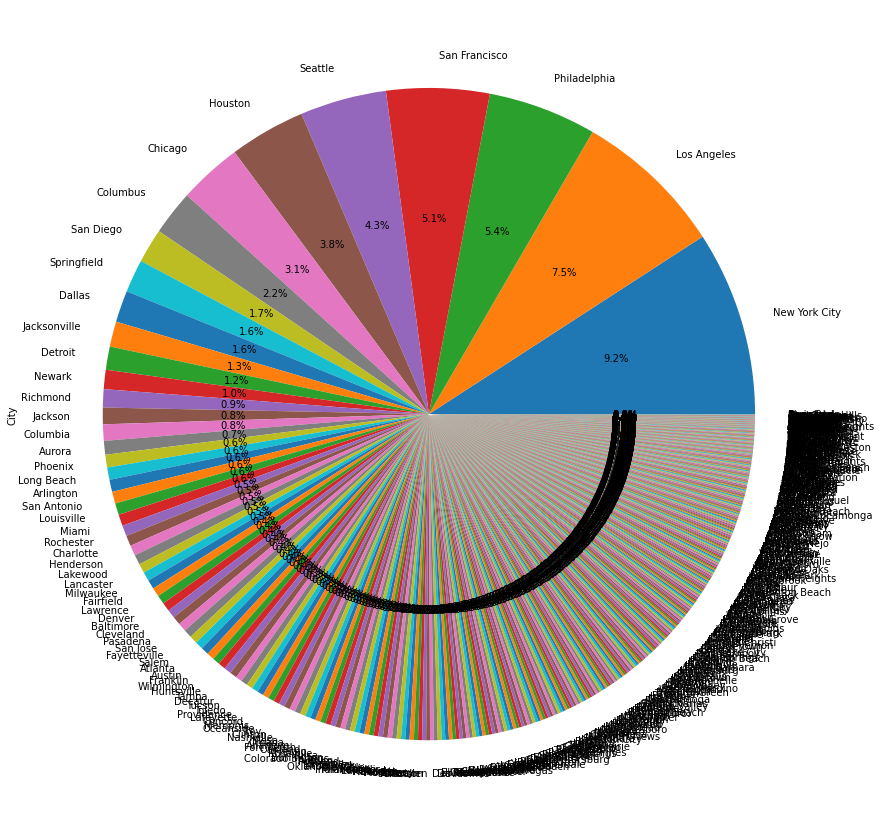

In [20]:
plt.figure(figsize=(28,15))
SampleSuperstore_df['City'].value_counts().plot.pie(autopct="%1.1f%%")

**As we see in the above data we found that on 17 city cover more than 50% area what signifies is that number of consumere are more from that area and that same for the state**

<AxesSubplot:ylabel='State'>

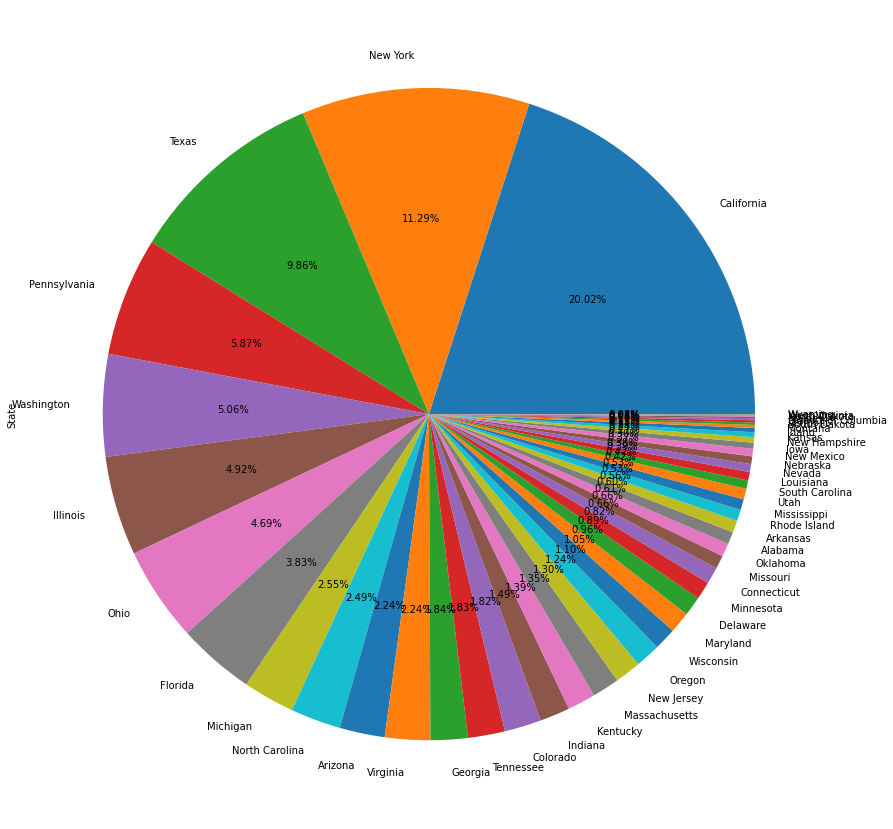

In [21]:
plt.figure(figsize=(28,15))
SampleSuperstore_df['State'].value_counts().plot.pie(autopct="%2.2f%%")

<AxesSubplot:ylabel='Ship Mode'>

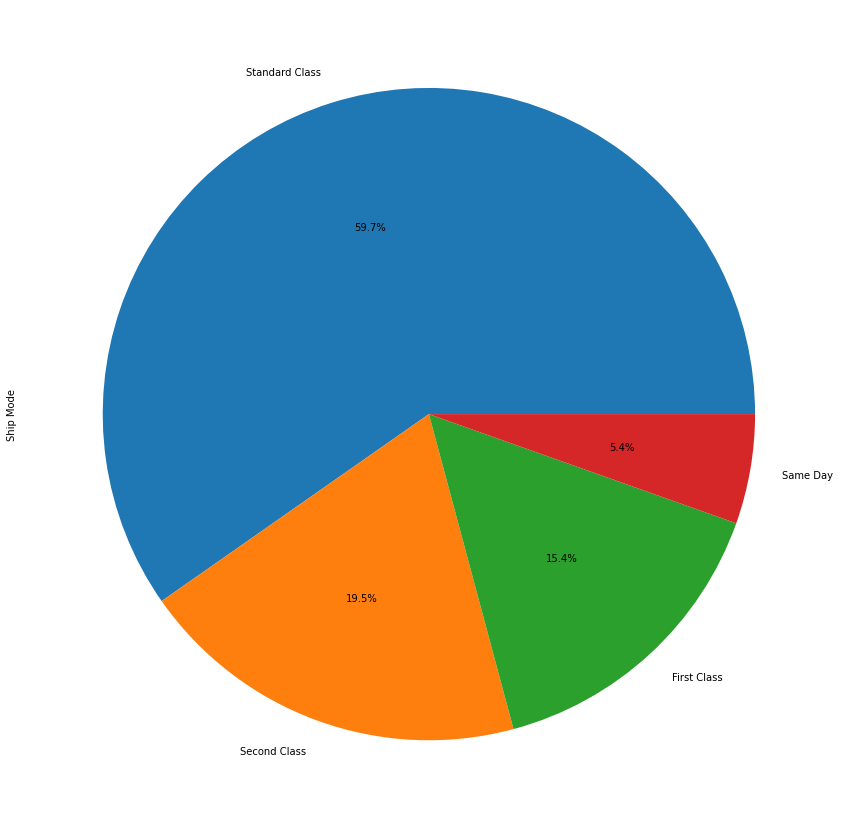

In [22]:

plt.figure(figsize=(28,15))
SampleSuperstore_df['Ship Mode'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='Category'>

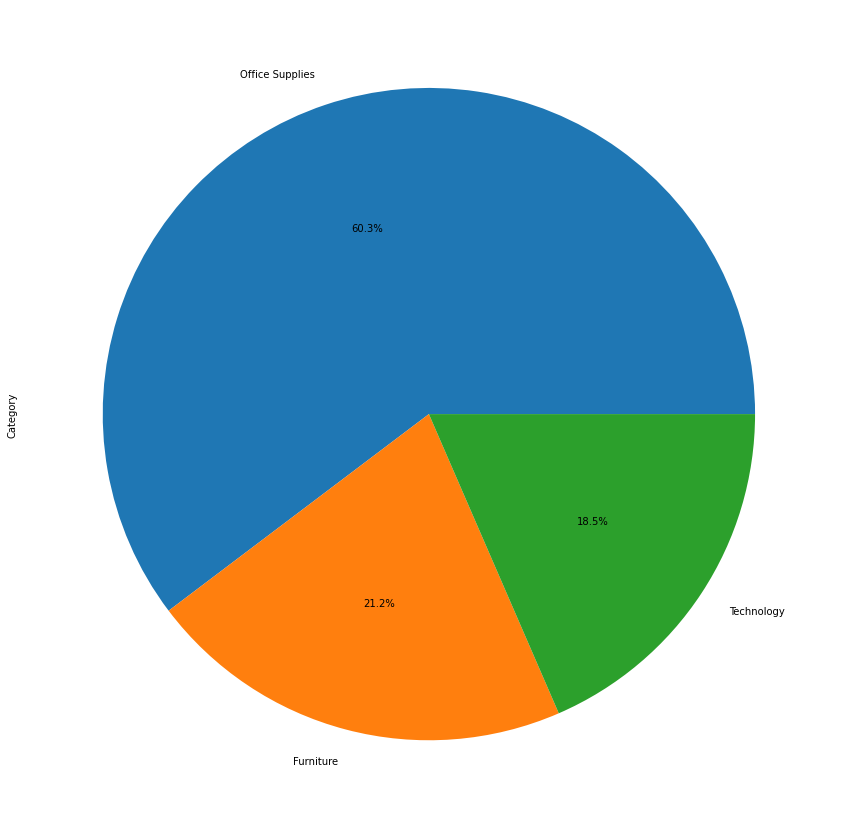

In [23]:
plt.figure(figsize=(28,15))
SampleSuperstore_df['Category'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='Sub-Category'>

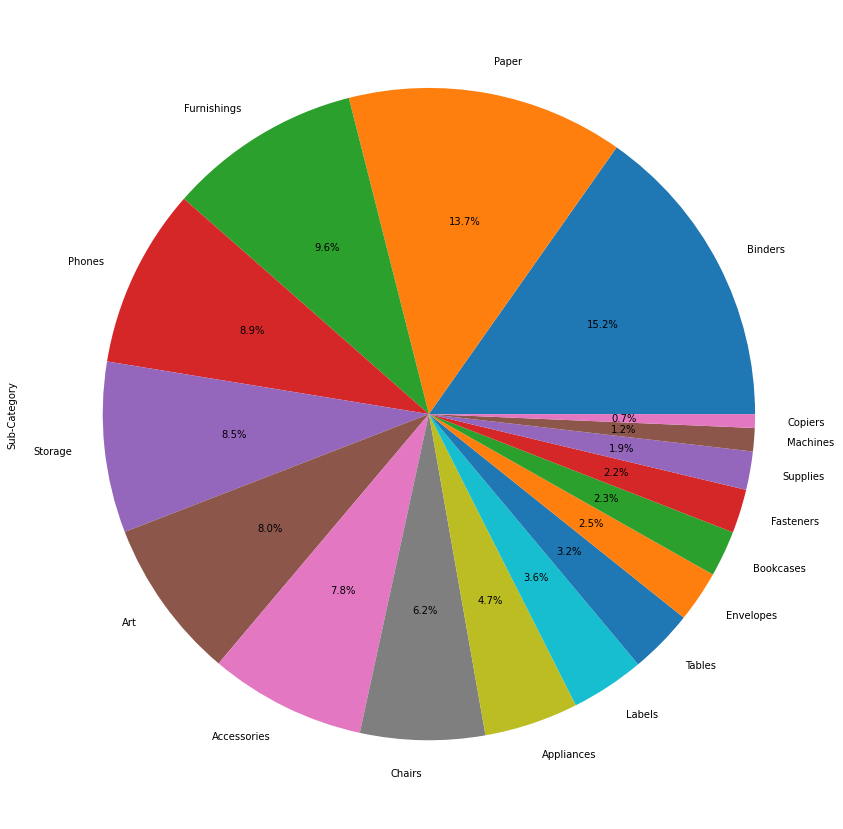

In [24]:
plt.figure(figsize=(28,15))
SampleSuperstore_df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

C:\Users\ashis\.conda\envs\tensorflow_keras\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

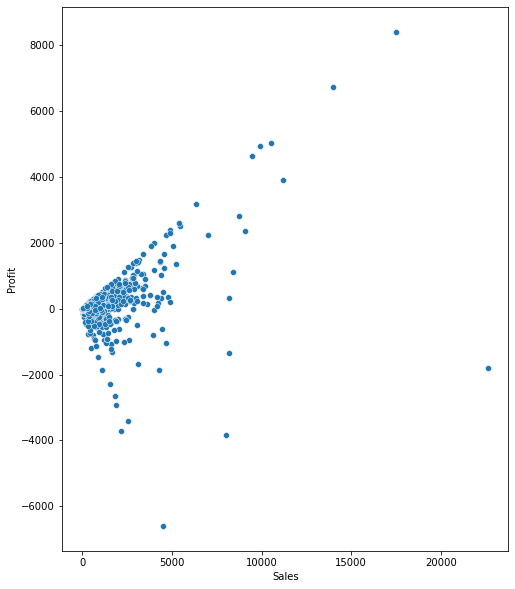

In [25]:

plt.figure(figsize=(8, 10))
sns.scatterplot("Sales",'Profit',data=SampleSuperstore_df)

C:\Users\ashis\.conda\envs\tensorflow_keras\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

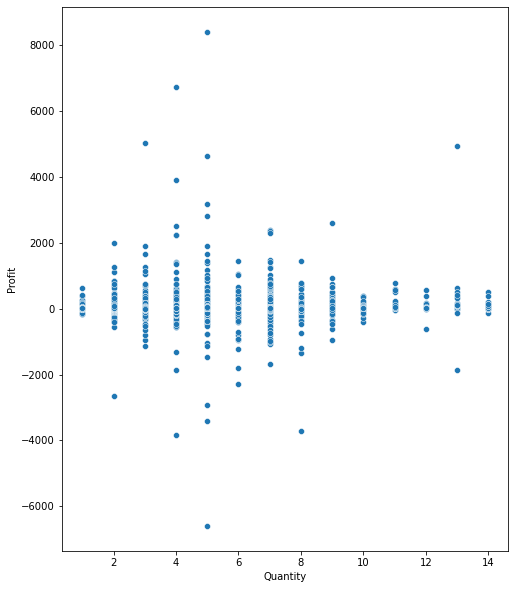

In [26]:
plt.figure(figsize=(8, 10))
sns.scatterplot("Quantity",'Profit',data=SampleSuperstore_df)

C:\Users\ashis\.conda\envs\tensorflow_keras\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

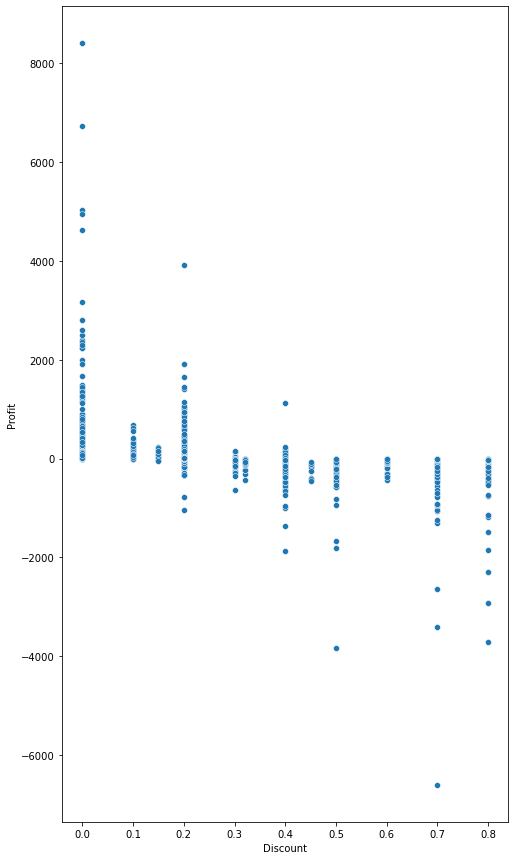

In [27]:
plt.figure(figsize=(8, 15))
sns.scatterplot("Discount",'Profit',data=SampleSuperstore_df)

**So finally it is end of the data analysis what we found in recent comparing that Quantity is going to act like uniform byt the Discount no it will effect very much as we see as Discount is increasing profit is decreasing mainly.**